In [2]:
import pandas as pd
import numpy as p
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("../Downloads/international.csv",parse_dates=["Month"],index_col=["Month"])
df.head()

,International_Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
df.isna().sum()

International_Passengers    0
dtype: int64

<AxesSubplot:xlabel='Month'>

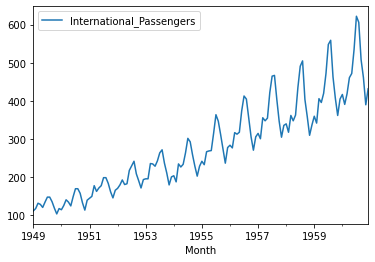

In [19]:
df.plot()

<AxesSubplot:>

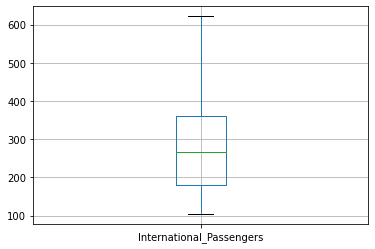

In [20]:
df.boxplot()

In [21]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df.International_Passengers)
p_val=res[1]
if p_val>0.05:
    print("Not Stationary")
else:
    print("Stationary")

Not Stationary


In [22]:
new_df=df.diff()

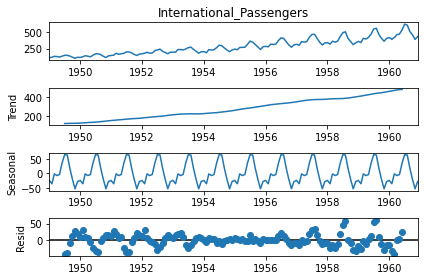

In [23]:
from statsmodels.api import tsa
decompose=tsa.seasonal_decompose(df.International_Passengers)
fig=decompose.plot()

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

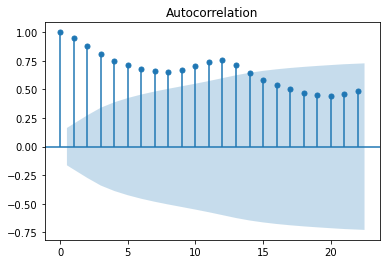

In [25]:
fig = plot_acf(df.International_Passengers)

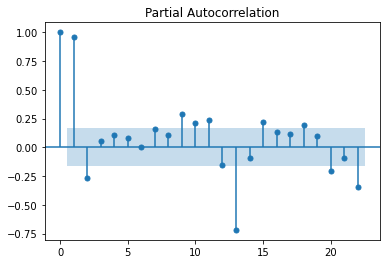

In [27]:
fig = plot_pacf(df.International_Passengers)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

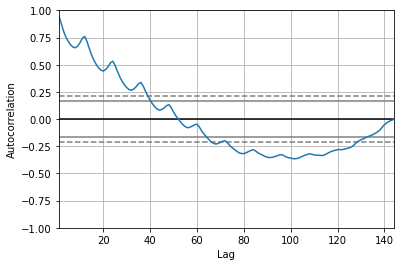

In [29]:
fig = plt.figure()
pd.plotting.autocorrelation_plot(df.International_Passengers)

In [31]:
from statsmodels.tsa.ar_model import AR
x = df.International_Passengers
model = AR(x)
model_fit = model.fit()

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [32]:
print("LAG:", model_fit.k_ar)

LAG: 13


In [33]:
print(model_fit.params)

const                           5.148972
L1.International_Passengers     0.760839
L2.International_Passengers    -0.085279
L3.International_Passengers     0.044238
L4.International_Passengers    -0.041790
L5.International_Passengers     0.054281
L6.International_Passengers    -0.052773
L7.International_Passengers     0.033219
L8.International_Passengers    -0.099693
L9.International_Passengers     0.145556
L10.International_Passengers   -0.125891
L11.International_Passengers    0.143583
L12.International_Passengers    0.907057
L13.International_Passengers   -0.665976
dtype: float64


In [34]:
ypred = model_fit.predict()

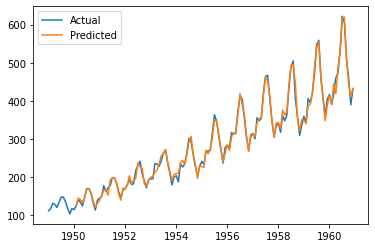

In [35]:
plt.plot(x, label = "Actual")
plt.plot(ypred, label = "Predicted")
plt.legend()

In [36]:
residual = model_fit.resid

<AxesSubplot:ylabel='Count'>

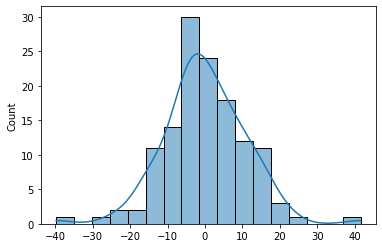

In [37]:
sns.histplot(residual, kde=True)